In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('IBTrACS/clean_ibtrac.csv', low_memory=False) 

In [3]:
dataset['VMAX'] = dataset['VMAX']*0.514444

In [5]:
def duration(data):
    time_start = data[data['VMAX']>=33].iloc[0]['TIME']
    time_peak = data['TIME'][data['VMAX'].idxmax()]
    return (time_peak-time_start)

In [6]:
dataset['TIMESTAMP'] = pd.to_datetime('1858-11-17', format='%Y-%m-%d') + pd.to_timedelta(dataset.TIME, unit='d')

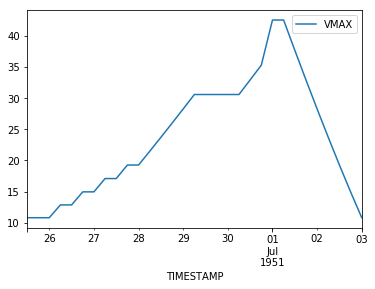

In [7]:
dataset[dataset['CycNo']==5468].plot('TIMESTAMP','VMAX')
plt.show()

In [8]:
duration = dataset.groupby('CycNo').apply(duration)

In [9]:
duration = duration[duration > 0]

In [11]:
from scipy import stats

year_occur = dataset.groupby('CycNo')['YEAR'].agg(lambda x: stats.mode(x)[0][0]).reset_index()

In [12]:
useful_data = duration.to_frame().join(year_occur.set_index('CycNo'), how='left').reset_index()

In [13]:
useful_data.columns = ['CycNo', 'Duration', 'YEAR']

In [14]:
import numpy as np
graph_data = useful_data.groupby('YEAR')['Duration'].apply(np.mean).reset_index()

In [15]:
graph_data['TIME'] = pd.to_datetime(graph_data['YEAR'],format='%Y')

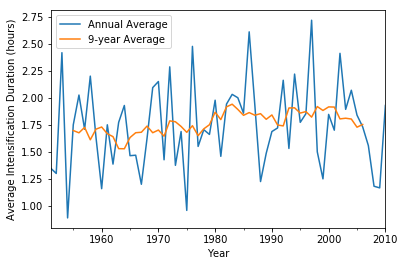

In [16]:
graph_data2 = graph_data
graph_data2 = graph_data2.set_index('TIME')

graph_data2 = graph_data2.rolling(min_periods=9, window=9, center=True).mean()
graph_data2 = graph_data2.reset_index()

ax = graph_data.plot('TIME', 'Duration', label='Annual Average')
plt.ylabel('Average Intensification Duration (hours)')
graph_data2.plot('TIME', 'Duration', ax=ax, label='9-year Average')
plt.xlabel('Year')
# plt.gcf().set_size_inches(10,10)
plt.show()

In [17]:
graph_data.to_csv('int_duration.csv',index=False)